# Instructions for how to reproduce the eBOSS DR16 analysis using public data

This notebook will serve as instructions/a tutorial on how to reproduce the eBOSS DR16 analysis using the publicly available delta's and quasar catalog from SDSS. It is intended that you will use your personal computer to do this analysis, though if you have access to a cluster it should still work

**Note**: Steps 1 through 3 of this notebook require setting environment variables in your bash file. Once you have set all of the environment variables you will probably need to restart your terminal to see them

## 1. Setup Picca

[Picca](https://github.com/igmhub/picca) is the python package used in this analysis. You can install it following the directions in the github link or follow the instructions below. If you follow the instructions on github, **make sure you install version 4.0!** The instructions here will install picca in a new conda environment.

In the terminal (The module load line is especially important if you are using python on a cluster):<br>

**Note**: change name to whatever you want your environment to be named. After you activate your environment you can pip install any other packages you want or need

Move to the directory where you will clone the github repository (make sure your environment is active!)

**Note**: it is very important that you checkout the v4 tag. Follow the commands below exactly to do this. 

To check that you successfully created an environment, type `conda env list` in the terminal. A star will appear next to the environment that is currently active

To load your picca environment in a terminal all you need to do is:

You will also need to setup an environment variable pointing to your picca installion. <br>
Add `export PICCA_BASE="/path/to/your/picca"` to your .bash_profile file (on Mac). If you are not familiar with bash files [this](https://medium.com/@himanshuagarwal1395/setting-up-environment-variables-in-macos-sierra-f5978369b255) is a good resource to look at.<br>
Check that your variable is set: `echo $PICCA_BASE`. The path printed should be where you installed picca

## 2. Install baoutil

Navigate to the directory where you will clone the baoutil github repository

This should install baoutil from the branch named julien (do **not** use master). To list all branches type `git branch` in the terminal from the baoutil directory. A list will pop up and the branch you are on will be starred. To exit, type `q`. 

You will need to set the following environment variables:<br>
`export PATH=$SOFTDIR/baoutil/bin:${PATH}`<br>
`export PYTHONPATH=$SOFTDIR/baoutil/py:${PYTHONPATH}`<br>
Here, `$SOFTDIR` is the path to where you cloned baoutil. For example, if your path to baoutil is `/Users/abault/python/baoutil` then `$SOFTDIR` would be `/Users/abault/python/` <br> You can add these two lines to your .bash_profile file, or run them in the terminal. <br> **Note**: If you choose not to add them to your .bash_profile file, you will need to run these lines in the terminal each time you start a new one or each time you activate your picca environment

We need to make a small edit to the plotting code in baoutil. Open the `plot_xi.py` file located in `baoutil/bin/`. One line 375, change <br> `f.savefig(args.out_figure+".png",bbox_inches="tight")` <br>
to <br>
`plt.savefig(args.out_figure+".png",bbox_inches="tight")`

You also need to change two lines in `extract_fit_pars.py`. Open this file located in `baoutil/bin/`.

First, on line 24, change <br> `param=i.decode("utf-8")` <br> to <br> `param = i`

Second, on line 34, make the same change: <br> `param=i.decode("utf-8")` <br> to <br> `param=i`

These changes will allow you to save and view the plots of the correlations you create as well as view and save the paramters from the models

## 3. Make folders

You need to create some folders and another environment variable to do this analysis.

First, create a folder that you will work out of while doing this analysis. Create an environment variable pointing to this folder by adding<br> `export DR16_BASE="/path/to/your/folder"` to your .bash_profile. Follow the steps above to make sure you've created the variable successfully.


**Note**: I recommend keeping the name DR16_BASE for this variable or you will need to change **all** of the paths in **all** of the files later on.

In step 7, the fitter will create many h5 files. To make sure there aren't any errors thrown if you have to run the fitter multiple times on the same correlation/fit, add `HDF5_USE_FILE_LOCKING=FALSE` to your .bash_profile.

Now, in your DR16_BASE folder, create the following directories by using either the commands below in the terminal or manually in a file browser:

Copy the following folders from the picca github repo to your DR16_BASE:

## 4. Download Data

#### Quasar Catalog

The quasar catalog can be found [here](https://www.sdss.org/dr16/algorithms/qso_catalog). You will want to download `DR16Qv4.fits`. Once you've downloaded the catalog, you'll need to rename some columns to make sure you are using the correct redshift. The instructions below will use astropy but you can use another package if you have a preference

In [1]:
from astropy.io import fits

Open the catalog

In [2]:
file = fits.open('DR16Q_v4.fits') #this assumes you are in the directory where you downloaded the file

In [3]:
file.info() #we want to use 'CATALOG'

Filename: DR16Q_v4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU    375   750414R x 183C   [18A, D, D, J, J, I, 6A, 6A, I, D, I, D, I, I, I, K, D, I, I, D, I, D, I, D, D, I, D, 12A, D, J, 19A, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, E, 5D, 5D, 5D, E, D, D, D, D, D, D, D, D, K, K, K, K, K, K, J, J, J, 74J, 74J, 74I, 74I, B, J, 3A, J, J, J, D, D, D, D, 14A, J, D, 5E, 5D, 5E, 5D, 5E, D, D, I, D, D, D, D, I, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, I, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, 21A, D, D, E, E, D, K, D, D, E, E, E, E, E, E, E, D, I, 28A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [4]:
#it is not necessary to run this cell unless you want to look at all the different column names
#file['CATALOG'].columns #look at all the columns

Change the column names in the following order:<br> 'Z' --> 'Z1' and 'Z_LYAWG' --> 'Z'

In [5]:
file['CATALOG'].columns['Z'].name = 'Z1'
file['CATALOG'].columns['Z_LYAWG'].name = 'Z'

Check that the names are correct for the columns you changed

In [7]:
print(file['CATALOG'].columns['Z1'])
print(file['CATALOG'].columns['Z'])


name = 'Z1'; format = 'D'
name = 'Z'; format = 'E'


In [8]:
file['CATALOG'].columns['Z_LYAWG'] #should receive an error from this

KeyError: "Key 'Z_LYAWG' does not exist."

In [9]:
file.writeto('DR16Q_v4_1.fits') #it is VERY important to keep this naming structure, or else future commands won't work properly

OSError: File 'DR16Q_v4_1.fits' already exists.

Move this file to `$DR16_BASE/Catalogs`

In your `.bash_profile` file set the following environment variable: <br>
`export QSO_CAT="/path/to/Catalogs/DR16Q_v4_1.fits"`

#### Lyman-alpha Forest 

The lyman-$\alpha$ forest deltas can be downloaded from [here](https://data.sdss.org/sas/dr16/eboss/lya/). You will want to download both `Delta_LYA` and `Delta_LYB`. Run the command below in the terminal from your DR16_BASE directory to download all the delta files from SDSS/eBOSS. The command will create folders called `Delta_LYA` and `Delta_LYB` and inside each will be a folder called `Delta` where the fits files will be. <br>
**Note**: While running this command you will see an error for each file that does not exist, since there is not a file for each number 1-464. It is perfectly fine to ignore these warnings.

**Note**: If you want to test to make sure you have the correct folder setup, run the command but change 464 to 20. The path to a fits file should look like `$DR16_BASE/Delta_LYA/Delta/delta-*.fits.gz` or `$DR16_BASE/Delta_LYB/Delta/delta-*.fits.gz` depending on which file you are looking at. More information about curl can be found [here](https://everything.curl.dev/).

**Note**: You may have an issue downloading the Delta files using curl. If you come across any errors, you can add the -k flag to the command:

## 5. Measure Correlations

Now it is time to run scripts to measure the correlations! This will be done from the terminal, so if you haven't already done this: activate your picca environment and navigate to DR16_BASE. These will likely take a lot of time to run (depending on your computer) so the jobs will be split up as much as possible to keep them from taking too long. You could run all 3 options (corr, dist, met) in one command but it will take a **very** long time. If you want to run less jobs, run `--do_corr` and `--do_dist` in the same command, but keep `--do_met` in a separate command.
<br><br> The following commands can be run in your terminal to run the auto- and cross-correlations. The files output from the script will be saved in the Correlations folder

**Note**: If you did not keep the suggested names for the earlier environment variables you will need to edit `send_cor.py` before running the below commands to make sure the paths are correct

**Note**: Make sure you run all of the commands from DR16_BASE, or you will get an error!

**Note**: You will see some warnings pop up while running the following commands. It is perfectly fine to ignore them

LyaLya x LyaLya Auto-correlation commands:

There are two options for the commands for running the correlations:

or

**The below commands are typed out to run everything separately. If you decide to follow these and run them separately, you must make sure that <br> `--do_corr` finishes before running `--do_dist` and `--do_met`, otherwise you will get an error.** You have the option for all of the below commands to combine `--do_corr` and `--do_dist`.

**Always keep `--do_met` separate, as it takes a very long time to run!**

If you run each command separate and one at a time, they can take anywhere from 30 minutes to ~1 hour to complete. If you run multiple commands at once then each will take longer to complete. Running all commands at the same time can take more than 4 hours to complete.

This tutorial runs these commands in the background of the terminal. You always have the option not to run in the background by simply removing the "&" from the end of the commands.

LyaLya x LyaLyb Auto-correlation commands:

LyaLya x QSO Cross-correlation commands:

LyaLyb x QSO Cross-correlation commands:

**Note**: If you run multiple commands at one time, you can check if they are still running or if they are done by typing `jobs` into the terminal

**A breakdown of the above commands**:<br>
`python -u Scripts/send_cor.py` is the script used to measure the correlation<br>
`--corr_type 'LyaLya'` specifies which correlation you are doing, auto or cross, and also specifies if you are looking at Lya absorption in the Lyb forest or not<br>
`--do_corr` tells the script to measure the correlation <br>
`--do_dist` tells the script to measure the distortion matrix <br>
`--do_met` tells the script to measure the metal matrix <br>
**Note**: You can use all 3 of the above options (corr, dist, met) in the same command but they take a **very** long time to run that way! <br>
`> info_LyaLya_corr` forces all of the output that you would see in the terminal into a file called `info_LyaLya_corr`. This file will by default output into whatever directory you are running the command from in the terminal. You can send it somewhere more specific by using `/path/to/specific/place/info_LyaLya_corr` instead. You can also name it whatever you want<br>
`&` runs everything in the background so you can still use your terminal

## 6. Plot Correlations

#### Wedges

The following commands will make wedge plots of the correlations you just ran and save them as .png files in a folder called `Plots`

**Note**: This is a baoutil function so make sure you've set your environment variables!

**Note**: Make sure you run the following commands from DR16_BASE or you will get an error!

LyaLya and LyaLyb Auto-correlations:

LyaLya and LyaLyb Cross-correlations:

#### 3D Plots

The following plots were made using code adapted from Hiram K. Herrera Alcantar and Andrea Muñoz Gutiérrez. The code is copied at the end of this notebook and there you can run the cells to make the 3D plots of the correlation.

## 7. Run Fitter

Use the following commands to run picca_fitter2 on the correlations. There will be a total of 7 fits being run:<br>
* LyaLya x LyaLya Auto-correlation (auto_lya)<br>
* LyaLya x LyaLyb Auto-correlation (auto_lyb)<br>
* LyaLya x LyaLya & LyaLya x LyaLyb Auto-correlation (auto_all)<br>
* LyaLya x QSO Cross-correlation (cross_lya)<br>
* LyaLyb x QSO Cross-correlation (cross_lyb)<br>
* LyaLya x QSO & LyaLyb x QSO Cross-correlation (cross_all)<br>
* All of the correlations combined (combined)

**Note**: If you changed any of the environment variable names you will need to edit all of the chi2 and config files to make sure the paths in them are correct.

**Note**: Make sure you run the following commands from DR16_BASE or you will get an error!

**Note**: Results from the fitter will output into the `Fits/auto`, `Fits/cross`, or `Fits/combined` folders, depending on which fit you are running

## 8. Extract Fit Parameters & Model

#### Parameters

Use the following commands to extract the parameters from the results of the fitter:

**Note**: This is a baoutil function so make sure you've set your environment variables!

**Note**: Make sure you run the following commands from DR16_BASE or you will get an error!

See how close your results are to the results in Table 6 of [this paper](https://arxiv.org/pdf/2007.08995.pdf). There will be more parameters in the files than in the table. It is also expected that the results from this tutorial will differ from the paper a little bit, since the quasar catalog in this tutorial is different from the original catalog.

#### Model

Since we only plot the individual correlations and not the full and combined correlations, you can use the following commands to extract the model for the individual correlations (you will plot these in the next section)

**Note**: This is a baoutil function so make sure you've set your environment variables!

**Note**: Make sure you run the following commands from DR16_BASE or you will get an error!

## 9. Plot Correlations and Model

This is the same plotting code from earlier, except now we are adding the `--model` option and specifying the extracted model file from the previous step

**Note**: Make sure you run the following commands from DR16_BASE or you will get an error!

LyaLya and LyaLyb Auto-correlations:

LyaLya and LyaLyb Cross-correlations:

## 10. 3D Correlation Plotting Code

The following is code adapted from Hiram K. Herrera Alcantar and Andrea Muñoz Gutiérrez:

**Note**: Make sure your kernel for this notebook is your picca environment

**Note**: Make sure you copy or move this notebook to DR16_BASE otherwise the plots below will not save and you will get an error!

In [1]:
import numpy as np
import glob,os
import matplotlib.pyplot as plt
import fitsio
from astropy.io import fits
from astropy.table import Table
import picca.wedgize,h5py

In [2]:
class Correlation:
    
    def __init__(self, data_file=None, fit_file=None):
        self.data=data_file
        if data_file:
            self.read_data(data_file)
        self.fit=fit_file
        if fit_file:
            self.read_fit(fit_file)
            
    def read_data(self, data_file):
        #- Reading the input data file
        h = fitsio.FITS(data_file)
        #-- the correlation function
        da = h[1]['DA'][:]
        nb = h[1]['NB'][:]
        #-- the covariance matrix
        co = h[1]['CO'][:]
        rp = h[1]['RP'][:]
        rt = h[1]['RT'][:]
        #-- Reading header 
        hh = h[1].read_header()
        rpmin = hh['RPMIN']
        rpmax = hh['RPMAX']
        rtmin = 0
        rtmax = hh['RTMAX']
        nrp = hh['NP']
        nrt = hh['NT']
        h.close()
        self.da = da
        self.co = co
        self.rp = rp
        self.rt = rt
        self.r = np.sqrt(self.rp**2. + self.rt**2.)
        self.rpmin = rpmin
        self.rpmax = rpmax
        self.rtmin = rtmin
        self.rtmax = rtmax
        self.nrp = nrp
        self.nrt = nrt
        self.nb = nb
        self.read_dmat()
        self.read_metal_dmat()
        
    def read_dmat(self):
        if self.data:
            basedir,dmat_filename_tmp = os.path.split(self.data)
            dmat_filename_tmp= dmat_filename_tmp.replace('cf','dmat')#Works for both cf and xcf
            dmat_filename = dmat_filename_tmp.replace('-exp','')
            dmat_filename = os.path.join(basedir,dmat_filename)
            try:
                h = fitsio.FITS(dmat_filename)
                self.dmat_file=dmat_filename
                self.dmat=h[1]['DM'][:]
                h.close()
            except:
                print(f"MISSING DMAT FILE: {dmat_filename}")
                
    def read_metal_dmat(self):
        if self.data:
            basedir,metal_dmat_filename_tmp = os.path.split(self.dmat_file)
            metal_dmat_filename='metal_'+metal_dmat_filename_tmp.replace('.gz','')
            metal_dmat_filename=os.path.join(basedir,metal_dmat_filename)
            try:
                h = fitsio.FITS(metal_dmat_filename)
                self.metal_dmat_file=metal_dmat_filename
                self.metal_dmat=Table(h[2][:])
                h.close()
            except:
                print(f"MISSING METAL DMAT FILE: {metal_dmat_filename}")
        

def plot_wedges(dataset, mu_values = [1., 0.95, 0.8, 0.5, 0], power = 2,rmin=10,rmax=180,label=None,limits=None,title=None):
    mu_low  = mu_values[:-1]
    mu_high = mu_values[1:]
    plt.figure(figsize=(16,8))
    for i, (mumax, mumin) in enumerate(zip(mu_low,mu_high)):
        plt.subplot(2,2,i+1)
        for j,data in enumerate(dataset):
            b = picca.wedgize.wedge(mumin=mumin, mumax=mumax,
                                    rpmin=data.rpmin, rpmax=data.rpmax, 
                                    rtmin=data.rtmin, rtmax=data.rtmax, 
                                    nrt=data.nrt, nrp=data.nrp, absoluteMu=False)

            #-- Compute wedge for data
            r, wedge_data, wedge_data_cov = b.wedge(data.da, data.co)
            y = wedge_data*r**power
            yerr = np.sqrt(np.diag(wedge_data_cov))*r**power 
            p=plt.errorbar(r, y, yerr, fmt="o",label=label[j])
            c=p[0].get_color()
            plt.xlabel(r"$r \, [h^{-1}\, \mathrm{Mpc}]$")
            plt.ylabel(r"$r^{}\xi(r)$".format(power))
            plt.title(r"${}<\mu<{}$".format(mumin,mumax),fontsize=16)
            plt.grid(linestyle='--')
            if data.fit is not None:
                r, wedge_model, _ = b.wedge(data.fit, data.co) 
                ymod = wedge_model*r**power
                w = (r>=rmin)&(r<=rmax)
                plt.plot(r[w], ymod[w], linestyle='--', linewidth=2,color=c)
        if i==0:
            plt.legend()
        if limits is not None:
            plt.ylim(limits[2*i],limits[2*i+1])
    if title is not None:
        plt.suptitle(title,fontsize=20)
    plt.tight_layout()
    
def plot_corr_mat(dataset,power=2,label=None,vmin=None,vmax=None,
                  plot_difference=False,title=None):
    nfigs=len(dataset)
    if plot_difference: nfigs+=1
           
    plt.figure(figsize=(6*nfigs,6))
    for i,data in enumerate(dataset):
        extent= [data.rtmin,data.rtmax,data.rpmin,data.rpmax]
        nrp,nrt=data.nrp,data.nrt
        r = data.r.reshape(nrp,nrt)
        mat = data.da.reshape(nrp,nrt)*r**power
            
        plt.subplot(1,nfigs,i+1)
        plt.imshow(mat, origin='lower',extent=extent, interpolation='nearest',cmap='seismic',vmin=vmin,vmax=vmax)
        cbar = plt.colorbar()
        plt.xlabel(r'$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$')
        plt.ylabel(r'$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$')
        cbar.set_label(r'$r\xi(r_{\parallel,r_{\perp}})$')
        plt.grid(True)
        if label:
            plt.title(label[i])
        cbar.update_ticks()
    if len(dataset)==2 and plot_difference:
        mat=dataset[0].da.reshape(nrp,nrt)-dataset[1].da.reshape(nrp,nrt)
        print(f'Maximum absolute difference in CORRELATION MATRIX is {np.max(mat):.3e}')
        vmax=np.max(mat)
        plt.subplot(1,nfigs,i+2)
        plt.imshow(mat, origin='lower',extent=extent, interpolation='nearest',cmap='seismic',vmin=-vmax,vmax=vmax)
        cbar = plt.colorbar()
        cbar.set_label(r'$\Delta \xi(r_{\parallel},r_{\perp},)$')
        plt.title('Difference')
        plt.xlabel(r'$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$')
        plt.ylabel(r'$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$')
        plt.grid(True)
        
        
        print(f"Maximum absolute difference in COVARIANCE MATRIX is {np.max(abs(dataset[0].co-dataset[1].co)):.3e}")
        print(f"Maximum absolute difference in DISTORTION MATRIX is {np.max(abs(dataset[0].dmat-dataset[1].dmat)):.3e}")
        for key in dataset[0].metal_dmat.keys():
            if ('DM' in key) and ('WDM' not in key) and ('CIV' not in key):
                print(f"Maximum absolute difference in {key} is {np.max(abs(dataset[0].metal_dmat[key]-dataset[1].metal_dmat[key])):.3e}")
        
    if title is not None:
        plt.suptitle(title,fontsize=16)
    plt.tight_layout()
        

**Note**: You need to change the path below to the Correlations folder in your DR16_BASE. You will need to write out the path

In [1]:
path='/path/to/your/DR16_BASE/Correlations'

In [15]:
corrs=dict()
DR16_exps = sorted(glob.glob(os.path.join(path,'*-exp*')))
for dr16_file in DR16_exps:
    print(dr16_file) #lists all files that have -exp in the name
    filename = os.path.basename(dr16_file)
    redo_file = os.path.join(path,filename)
    label=filename.split('-')[0]
    corrs[label]=list()
    corrs[label].append(Correlation(data_file=redo_file))

['/global/homes/a/abault/picca_runs/DR16/Correlations/cf_LYA_in_LYA_LYA_in_LYB_z_0_10-exp.fits.gz', '/global/homes/a/abault/picca_runs/DR16/Correlations/cf_z_0_10-exp.fits.gz', '/global/homes/a/abault/picca_runs/DR16/Correlations/xcf_LYA_in_LYB_z_0_10-exp.fits.gz', '/global/homes/a/abault/picca_runs/DR16/Correlations/xcf_z_0_10-exp.fits.gz']
/global/homes/a/abault/picca_runs/DR16/Correlations/cf_LYA_in_LYA_LYA_in_LYB_z_0_10-exp.fits.gz
/global/homes/a/abault/picca_runs/DR16/Correlations/cf_z_0_10-exp.fits.gz
/global/homes/a/abault/picca_runs/DR16/Correlations/xcf_LYA_in_LYB_z_0_10-exp.fits.gz
/global/homes/a/abault/picca_runs/DR16/Correlations/xcf_z_0_10-exp.fits.gz


In [16]:
print(corrs.keys()) #lists the files that will be used

dict_keys(['cf_LYA_in_LYA_LYA_in_LYB_z_0_10', 'cf_z_0_10', 'xcf_LYA_in_LYB_z_0_10', 'xcf_z_0_10'])


cf_LYA_in_LYA_LYA_in_LYB_z_0_10


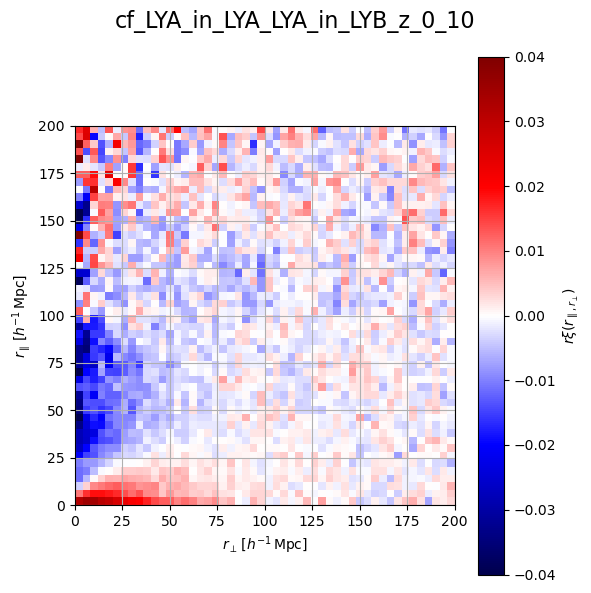


cf_z_0_10


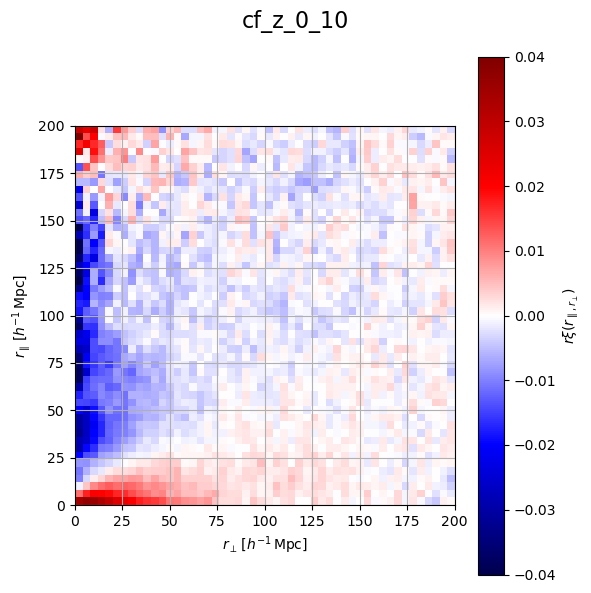


xcf_LYA_in_LYB_z_0_10


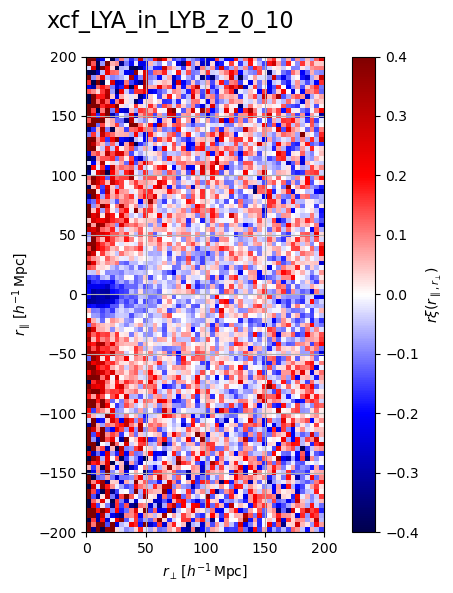


xcf_z_0_10


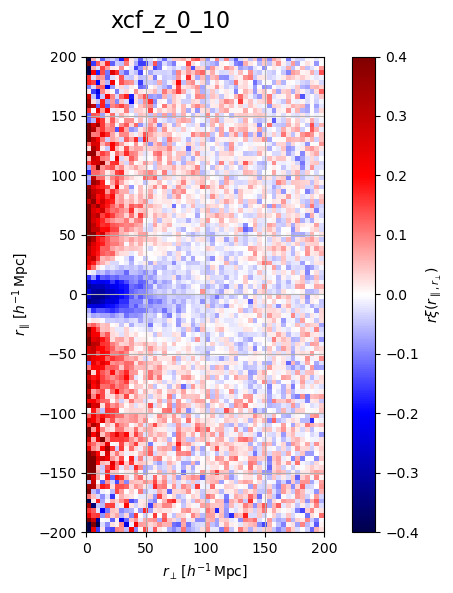

In [19]:
for w in corrs.keys():
    print(w)
    if 'cf' in w:
        vmin,vmax=-0.04,0.04
    if 'xcf' in w:
        vmin,vmax=-0.4,0.4
    plot_corr_mat(corrs[w],label=[''],power=1,vmin=vmin,vmax=vmax,title=w)
    plt.savefig(f'Plots/{w}_3d.png',dpi=200)
    plt.show()
    print()